In [2]:
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np
import scipy.stats as sps
import scipy
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
%matplotlib inline

**Задание 1**

Посчитаем следующие оценки параметра $\theta$ для всех $n \leq N$

$2\overline{X}$ \
$\overline{X}+\frac{X_{(n)}}{2}$ \
$(n+1)X_{(1)}$ \
$X_{(1)}$+$X_{(n)}$ \
$\frac{(n+1)}{n}X_{(n)}$

Построим графики разницы истинного значения параметра $\theta$ и оценки при различных значениях параметра.

In [32]:
N = 10 ** 4 # size of selection
x_scale = np.arange(1, N + 1)

def ex1(theta):
    data = sps.uniform.rvs(size=N, scale = theta)
    
    x_mean = np.cumsum(data) / np.arange(1, N + 1)
    x_min = np.minimum.accumulate(data)
    x_max = np.maximum.accumulate(data)
    
    estims = np.zeros((5, N))
    estims[0] = x_mean * 2
    estims[1] = x_mean + x_max / 2
    estims[2] = np.arange(2, N + 2) * x_min
    estims[3] = x_min + x_max
    estims[4] = np.arange(2, N + 2) / np.arange(1, N + 1) * x_max
    
    estims_names = [r'$2\overline{X}$', 
              r'$\overline{X} + \frac{X_{(n)}}{2}$', 
              r'$(n+1)X_{(1)}$', 
              r'$X_{(1)} + X_{(n)}$',
              r'$\frac{(n+1)}{n} * X_{(n)}$']
    
    plt.figure(figsize=(10,5))
    
    for i in range(5):
        if i == 2:
            continue
        plt.plot(x_scale, abs(estims[i] - theta), label = estims_names[i])
        
    plt.xlabel("n")
    plt.ylabel("estim")
    plt.legend()
    plt.title(f'\u03F4 = {theta}')
    plt.show()       
    
    plt.figure(figsize=(10,5))
    plt.plot(x_scale, abs(estims[2] - theta), label = estims_names[2])
    plt.legend()
    plt.show()

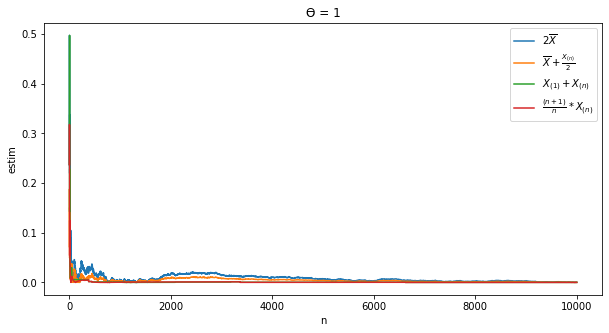

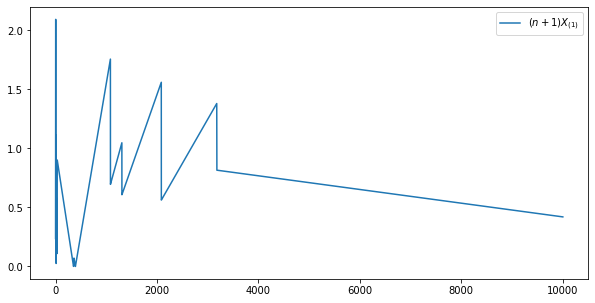

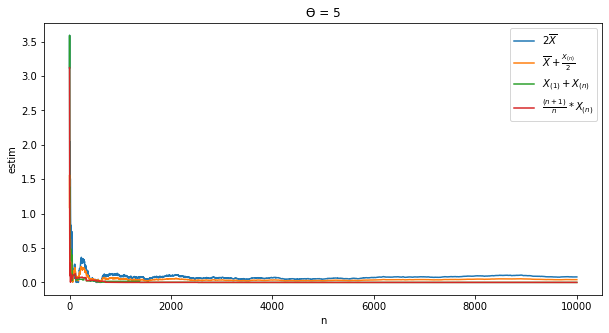

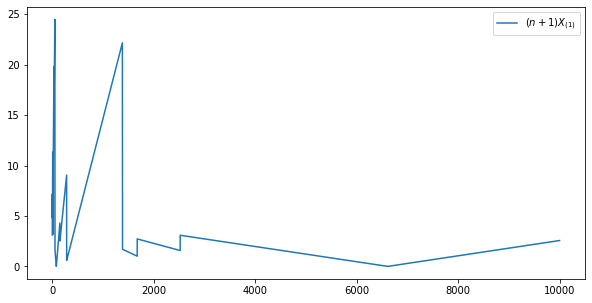

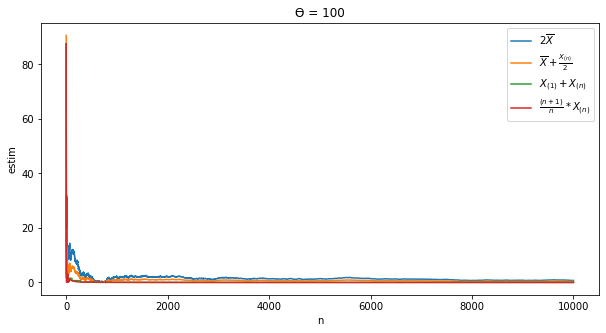

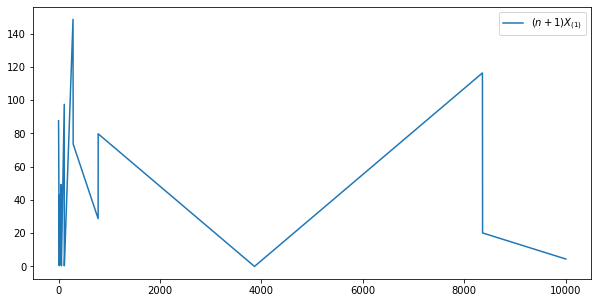

In [33]:
ex1(1)
ex1(5)
ex1(100)

**Вывод:**

1. В любом случае лучшей и несмещенной получается оценка $\frac{(n+1)}{n} * X_{(n)}$

2. Все оценки, кроме $(n+1)X_{(1)}$, являются состоятельными, то есть сходятся к истинному значению аргумента при росте n

**Задание 2**

Сгенерируем выборку из экспоненциального распределения с параметром $\theta = 1$, исследуем оценку 
$(\frac{k!}{\overline{X^k}})^{1/k}$ при различных значениях $k$

In [62]:
from math import factorial

N = 10 ** 4 # size of selection
x_scale = np.arange(1, N + 1)

def ex2(k, theta = 1):
    data = sps.expon.rvs(size=N, scale = theta)
    
    x_n_avg = np.cumsum(data ** (np.zeros(N) + k))
    estim = ((np.zeros(N) + factorial(k)) / x_n_avg) ** (1/ k)

    plt.plot(x_scale, abs(estim - theta), label ="k = {}".format(k))
    plt.xlabel("n")
    plt.ylabel("estim")
    plt.ylim(0, 10)
    plt.legend()


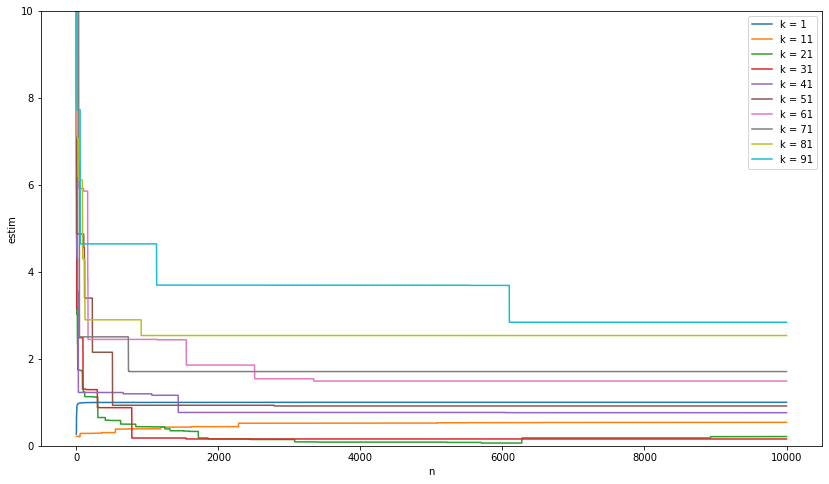

In [63]:
plt.figure(figsize=(14,8))
for k in range(1, 100, 10):
    ex2(k)
plt.show()

**Вывод**

При любом $k$ оценка является состоятельной, но чем больше $k$, тем сильнее оценка отклоняется от истинного значения аргумента.


**Задание 4**

Сгенерируем выборку из стандартного нормального распределения. Посчитаем эмпирическую функцию распределения. Для некоторых $n \in \{10, 25, 50, 100, 1000, N \} $ построим график эмпирической функции распределения вместе с истинной функцией распределения.

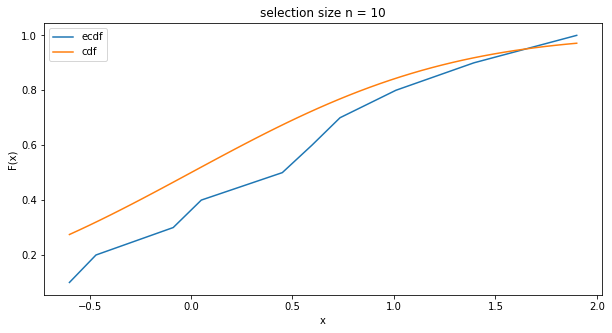

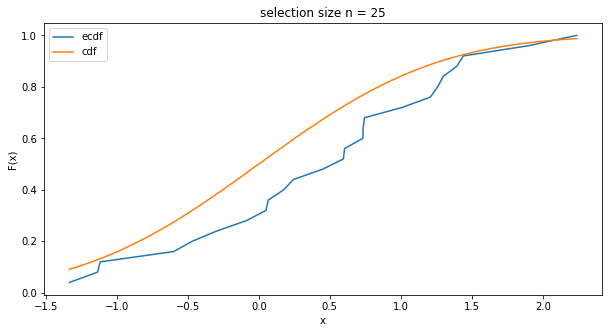

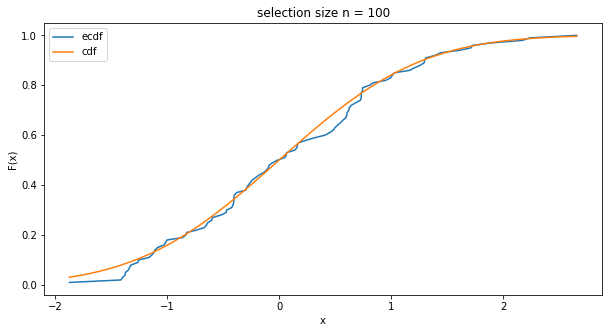

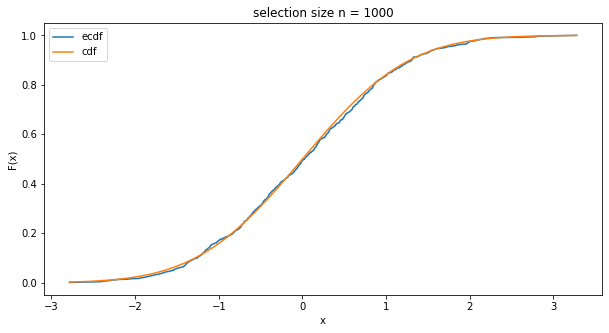

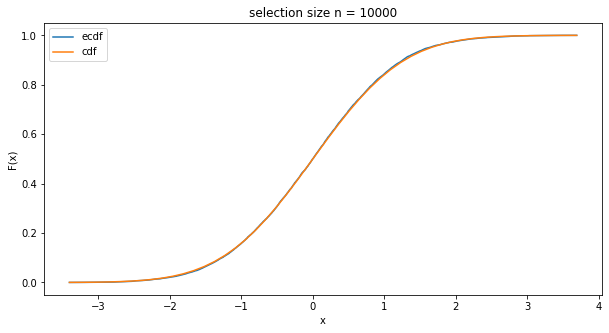

In [31]:
from statsmodels.distributions.empirical_distribution import ECDF

N = 10 ** 4

data = sps.norm.rvs(size=N)

for n in [10, 25, 100, 1000, N]:
    plt.figure(figsize=(10,5))
    
    sample = data[:n]
    emp_distr = ECDF(sample)
    plt.plot(emp_distr.x, emp_distr.y, label='ecdf')
    
    x = np.linspace(sample.min(), sample.max())
    true_distr = sps.norm.cdf(x)
    plt.plot(x, true_distr, label='cdf')
    
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.title('selection size n = {}'.format(n))
    plt.legend()
    plt.show()

**Вывод**

Чем больше n, тем выше точность